<a href="https://colab.research.google.com/github/akira234mirai/AlineRocha/blob/main/TARGETECH_Fraudes_cartao_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRINT IV**

Integrantes - Isadora Alves, Aline Rocha e Willian Martins
\
\
TargeTech - Esse projeto possui o objetivo de verificar transações fraudulentas e, com bases nelas desenvolver um modelo de classificação a fim de detectar possiveis fraudes durantes movimentações em sites de compras. Garantindo maior  segurança para o consumidor e empresa.

**ETAPA 1 - PRÉ-PROCESSAMENTO DE DADOS**

Incialmente foi realizado a importação das bibliotecas Pandas para manipulação e analise de DataFrame, Numpy para manipulação de arrays, Seaborn e Matplotlib para visualização de dados e scikit-learn para aprendizado de maquina

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [ ]:
#Vericando dataset com a funçaõ read do pandas
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Com base em algumas verificações é possivel anaisar os tipos das colunas contidas no dataset, a existencia de valores nulos e a quantidade total de registros

In [ ]:
#Analisando informações como tipo quantidade de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Verificando nulos
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#Analisando a coorelação entre a coluna "Class" com as demais colunas do dataset
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [ ]:
#Vericando a coorelação de todas as colunas do dataset
df.corr(method='spearman')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.190647,-0.006419,-0.473348,-0.142156,0.226004,-0.111408,0.116722,-0.103882,0.017986,...,0.096564,0.132651,0.148505,-0.015980,-0.259220,0.000132,-0.035063,-0.143200,-0.040007,-0.011692
V1,0.190647,1.000000,-0.384328,-0.412095,0.101011,-0.106632,-0.086561,-0.227650,-0.236140,0.138614,...,-0.061958,-0.028827,0.145440,-0.000315,0.049291,0.006380,-0.104815,-0.207967,-0.086663,-0.042424
V2,-0.006419,-0.384328,1.000000,0.073967,0.155042,0.342701,-0.110393,0.426320,0.006980,-0.077880,...,-0.098255,-0.056478,-0.094982,0.012617,-0.085682,0.033865,0.129234,0.137976,-0.502052,0.051062
V3,-0.473348,-0.412095,0.073967,1.000000,0.060812,-0.223849,0.171263,-0.074582,0.164374,-0.030876,...,-0.040234,0.004404,-0.140076,-0.000559,0.031854,-0.016689,0.140724,0.180169,-0.000236,-0.059278
V4,-0.142156,0.101011,0.155042,0.060812,1.000000,0.021367,0.075185,0.059920,-0.009608,0.105248,...,0.038960,-0.004931,0.009615,-0.008782,0.060647,-0.064357,-0.033634,0.004757,-0.022117,0.063045
V5,0.226004,-0.106632,0.342701,-0.223849,0.021367,1.000000,-0.007577,0.431573,-0.057022,-0.056580,...,-0.040364,-0.010920,-0.108300,-0.023076,-0.015618,0.029513,0.012883,-0.027806,-0.314061,-0.030147
V6,-0.111408,-0.086561,-0.110393,0.171263,0.075185,-0.007577,1.000000,-0.292680,0.444053,0.028864,...,0.034595,0.040370,-0.050293,-0.135166,-0.011131,-0.023932,0.073772,0.020459,0.205452,-0.038410
V7,0.116722,-0.227650,0.426320,-0.074582,0.059920,0.431573,-0.292680,1.000000,-0.389213,-0.100252,...,-0.022250,-0.023750,-0.186343,-0.012879,-0.046468,0.016724,-0.094494,0.056405,-0.030003,-0.048308
V8,-0.103882,-0.236140,0.006980,0.164374,-0.009608,-0.057022,0.444053,-0.389213,1.000000,-0.002511,...,0.076569,0.019775,0.075212,-0.024536,-0.074303,-0.007648,0.189916,0.089700,0.004371,0.022706
V9,0.017986,0.138614,-0.077880,-0.030876,0.105248,-0.056580,0.028864,-0.100252,-0.002511,1.000000,...,-0.065773,0.001958,0.074164,-0.001572,-0.022575,0.026677,-0.001804,-0.103743,-0.077437,-0.049499


In [ ]:
#Avaliando métricas de percentis, média e desvio padrão a fim de verificar dados inconsistentes
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Ainda na etapa de processamento é verificado que os dados do dataset estão desiguais para treinar um modelo de aprendizado de maquina, por essa razão é realizado um processo de balanceamento de classes a fim de manter uma mesma quantidade de registros tanto para fraude quanto para não fraude.

In [ ]:
#Avaliando métricas com dados que não foram classificados como fraudes
df_Nfraude = df.Amount[df.Class == 0]
df_Nfraude.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
#Avaliando métricas com dados que foram classificados como fraudes
df_SFraude = df.Amount[df.Class == 1]
df_SFraude.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#Criando um novo dataframe com todos os dados classificados como fraude
df_Fraude = df[df.Class == 1]
df_Fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
#Criando um novo dataframe com todos os dados classificados como não fraude
df_nao_fraude = df[df.Class == 0]
df_nao_fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
#Criando um novo dataframe para igualar fraudes e não fraudes
df_nao_fraude = df_nao_fraude.sample(492)
df_nao_fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
21292,31579.0,1.237234,0.690670,-0.354918,1.356176,0.041437,-1.255903,0.279470,-0.218179,-0.018084,...,-0.073245,-0.161376,-0.117769,0.238963,0.674801,-0.325795,0.032102,0.056470,1.00,0
262676,160597.0,-0.357385,0.842788,-1.200365,-0.212143,0.248431,-0.651602,0.802626,0.260216,-0.274027,...,0.360749,0.999852,0.065609,-0.561395,-0.322247,-0.142953,-0.080467,-0.024859,100.38,0
26453,34073.0,-1.769434,-1.142175,1.466326,-0.094982,2.140546,-1.723695,-0.541728,0.168415,-0.580977,...,0.066671,-0.481453,0.373688,-0.017979,-0.477154,-0.123785,0.021513,0.181102,12.99,0
100002,67377.0,1.205477,0.247405,-0.599937,1.312635,2.134258,3.860219,-0.632221,0.961053,-0.729920,...,-0.258123,-0.991178,0.111099,0.946632,0.335732,-0.244185,0.006686,0.028477,13.60,0
284308,172327.0,-0.196944,0.732359,-0.537274,-0.718291,0.475110,-0.092717,0.699330,0.406676,-0.535583,...,-0.081559,-0.441169,0.200523,0.353591,-0.319850,0.172506,-0.186396,-0.076028,64.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203624,134894.0,2.017857,-2.117522,0.195949,-1.287625,-2.157990,0.438429,-2.009794,0.247575,-0.299695,...,-0.137524,0.159816,0.186596,-0.335958,-0.469474,-0.197617,0.067825,-0.029550,96.00,0
105269,69444.0,-0.571671,0.552454,1.500342,-0.329852,0.244290,-1.223486,0.561135,-0.039953,-0.205302,...,-0.127326,-0.578050,0.100915,0.323284,-0.628759,-0.120900,0.077902,0.156576,1.98,0
71665,54391.0,-0.807548,1.141387,1.150308,1.279090,-0.357613,0.192020,0.086330,0.755692,-0.495534,...,0.056649,0.278235,-0.050642,0.189800,-0.176280,-0.245420,0.288177,0.130891,16.92,0
99575,67182.0,1.170842,0.171396,0.124102,0.490702,-0.302690,-1.055727,0.330816,-0.171242,-0.392812,...,-0.306911,-1.044239,0.140220,0.511578,0.201996,0.107050,-0.075881,0.005257,34.95,0


In [ ]:
df_nao_fraude.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,97678.707317,-0.020582,0.074394,0.030807,0.096460,0.078014,-0.006929,-0.024477,-0.004589,-0.006506,...,0.020689,0.024708,0.007028,-0.001272,-0.019998,0.004761,0.009325,0.006139,75.211768,0.0
std,47877.702553,1.809499,1.554398,1.409028,1.435260,1.332877,1.369581,1.234641,1.341029,1.046863,...,0.951149,0.763037,0.383594,0.650633,0.466398,0.471560,0.317512,0.239865,182.357073,0.0
min,55.000000,-12.687310,-17.098339,-7.051255,-4.349336,-6.790266,-5.735078,-13.893948,-18.550601,-3.807513,...,-10.695255,-5.788277,-2.121030,-2.096524,-2.027227,-1.290099,-3.148602,-2.413057,0.000000,0.0
25%,59452.500000,-0.902534,-0.471090,-0.810299,-0.805278,-0.668459,-0.776525,-0.584735,-0.217796,-0.595470,...,-0.218186,-0.547564,-0.137678,-0.383283,-0.314530,-0.338727,-0.058227,-0.055470,5.000000,0.0
50%,84576.500000,-0.162596,0.128840,0.132914,0.058340,-0.003041,-0.236625,0.021048,0.040140,-0.028743,...,-0.029504,-0.008917,-0.001921,0.034887,-0.035775,-0.042510,0.020170,0.011303,22.475000,0.0
75%,144454.750000,1.317526,0.909429,0.975640,0.879754,0.714005,0.429774,0.593844,0.361282,0.610650,...,0.192584,0.597659,0.153252,0.437693,0.321221,0.277744,0.105879,0.076796,69.990000,0.0
max,172327.000000,2.332541,9.281524,3.347285,4.657317,9.995227,5.746398,5.839506,3.876880,4.346171,...,14.198131,3.747040,2.527147,3.502385,1.340180,1.395548,1.051462,1.671900,1975.600000,0.0


In [ ]:
df_Fraude.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [ ]:
df_nao_fraude.corr(method='spearman')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.215233,0.045965,-0.531017,-0.140783,0.287733,-0.119673,0.186286,-0.153164,0.024470,...,0.146210,0.160949,0.167074,-0.054657,-0.227476,-0.007963,-0.055616,-0.138058,-0.045052,NaN
V1,0.215233,1.000000,-0.352851,-0.372711,0.126187,-0.076566,0.007115,-0.187815,-0.242930,0.215404,...,-0.046040,0.040481,0.103550,-0.060388,0.149141,-0.073706,-0.110042,-0.186193,-0.086384,NaN
V2,0.045965,-0.352851,1.000000,0.053357,0.127112,0.294985,-0.123763,0.436042,-0.059642,-0.112516,...,-0.174379,-0.158184,-0.148421,0.029804,-0.100880,0.083839,0.170163,0.155805,-0.521065,NaN
V3,-0.531017,-0.372711,0.053357,1.000000,0.104468,-0.253367,0.185068,-0.054914,0.108913,0.018839,...,-0.179755,-0.110525,-0.114841,0.060852,0.022594,0.037752,0.154889,0.188589,-0.020994,NaN
V4,-0.140783,0.126187,0.127112,0.104468,1.000000,0.000872,0.132542,-0.024706,-0.005288,0.081349,...,0.001384,0.006456,0.030347,0.017870,0.047266,-0.117541,0.025938,0.014016,-0.025753,NaN
V5,0.287733,-0.076566,0.294985,-0.253367,0.000872,1.000000,-0.023174,0.396159,-0.056322,-0.183762,...,0.045500,-0.014377,-0.161652,0.034792,-0.051895,0.018893,-0.037485,-0.009674,-0.262106,NaN
V6,-0.119673,0.007115,-0.123763,0.185068,0.132542,-0.023174,1.000000,-0.313000,0.349559,0.059727,...,0.008051,0.066465,-0.015538,-0.132938,0.082646,0.013745,0.043097,-0.016391,0.205147,NaN
V7,0.186286,-0.187815,0.436042,-0.054914,-0.024706,0.396159,-0.313000,1.000000,-0.419173,-0.121599,...,-0.048552,-0.012411,-0.231807,-0.003665,-0.066521,0.071657,-0.040960,-0.004725,-0.034039,NaN
V8,-0.153164,-0.242930,-0.059642,0.108913,-0.005288,-0.056322,0.349559,-0.419173,1.000000,-0.017892,...,0.066387,0.037842,0.134195,-0.008650,-0.095807,-0.012545,0.154093,-0.017068,0.032886,NaN
V9,0.024470,0.215404,-0.112516,0.018839,0.081349,-0.183762,0.059727,-0.121599,-0.017892,1.000000,...,-0.104053,-0.049693,0.110048,-0.046374,-0.042978,-0.021173,0.036249,-0.049916,-0.000782,NaN


In [ ]:
df_Fraude.corr(method='spearman')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.236509,-0.246350,0.111792,-0.190818,0.332200,0.198942,0.245644,-0.233094,0.152273,...,-0.145108,0.167079,0.127803,-0.028890,-0.188603,-0.076948,-0.271038,-0.072109,0.016376,NaN
V1,0.236509,1.000000,-0.605529,0.682235,-0.500703,0.746237,0.347409,0.794662,-0.348574,0.545978,...,-0.375244,-0.112338,-0.004973,-0.199111,0.107093,0.048903,-0.088761,0.107131,-0.187894,NaN
V2,-0.246350,-0.605529,1.000000,-0.835914,0.726771,-0.630928,-0.468601,-0.760652,0.385037,-0.724251,...,0.325976,-0.063761,-0.010639,0.053960,0.047270,0.097600,0.141770,0.099106,-0.206208,NaN
V3,0.111792,0.682235,-0.835914,1.000000,-0.769551,0.663820,0.590046,0.789595,-0.496804,0.770543,...,-0.339437,-0.009150,0.023850,-0.011158,-0.016004,-0.125123,-0.242259,-0.033382,0.035707,NaN
V4,-0.190818,-0.500703,0.726771,-0.769551,1.000000,-0.468337,-0.466823,-0.644381,0.399539,-0.821037,...,0.167126,0.073971,0.021763,0.018643,-0.066560,0.292038,0.171847,0.002221,-0.180207,NaN
V5,0.332200,0.746237,-0.630928,0.663820,-0.468337,1.000000,0.201716,0.752856,-0.485437,0.558307,...,-0.402410,-0.180505,-0.075471,-0.281802,0.099965,0.051333,-0.114261,0.092873,-0.313063,NaN
V6,0.198942,0.347409,-0.468601,0.590046,-0.466823,0.201716,1.000000,0.462284,-0.593560,0.483985,...,-0.350817,0.238250,0.369879,-0.106169,-0.183990,-0.072595,-0.268703,-0.147802,0.177039,NaN
V7,0.245644,0.794662,-0.760652,0.789595,-0.644381,0.752856,0.462284,1.000000,-0.479945,0.656392,...,-0.408684,-0.098765,0.013532,-0.114054,0.088128,-0.044044,-0.247436,-0.025583,0.082485,NaN
V8,-0.233094,-0.348574,0.385037,-0.496804,0.399539,-0.485437,-0.593560,-0.479945,1.000000,-0.513368,...,0.582404,-0.092137,-0.241508,0.071925,0.138533,0.163080,0.337266,0.109218,0.114835,NaN
V9,0.152273,0.545978,-0.724251,0.770543,-0.821037,0.558307,0.483985,0.656392,-0.513368,1.000000,...,-0.206219,-0.146364,0.071097,-0.040799,-0.035832,-0.283968,-0.234806,0.039700,0.119352,NaN


In [ ]:
#concatenado os dois dataframe
df_reg = pd.concat([df_nao_fraude, df_Fraude], axis = 0)
df_reg

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
21292,31579.0,1.237234,0.690670,-0.354918,1.356176,0.041437,-1.255903,0.279470,-0.218179,-0.018084,...,-0.073245,-0.161376,-0.117769,0.238963,0.674801,-0.325795,0.032102,0.056470,1.00,0
262676,160597.0,-0.357385,0.842788,-1.200365,-0.212143,0.248431,-0.651602,0.802626,0.260216,-0.274027,...,0.360749,0.999852,0.065609,-0.561395,-0.322247,-0.142953,-0.080467,-0.024859,100.38,0
26453,34073.0,-1.769434,-1.142175,1.466326,-0.094982,2.140546,-1.723695,-0.541728,0.168415,-0.580977,...,0.066671,-0.481453,0.373688,-0.017979,-0.477154,-0.123785,0.021513,0.181102,12.99,0
100002,67377.0,1.205477,0.247405,-0.599937,1.312635,2.134258,3.860219,-0.632221,0.961053,-0.729920,...,-0.258123,-0.991178,0.111099,0.946632,0.335732,-0.244185,0.006686,0.028477,13.60,0
284308,172327.0,-0.196944,0.732359,-0.537274,-0.718291,0.475110,-0.092717,0.699330,0.406676,-0.535583,...,-0.081559,-0.441169,0.200523,0.353591,-0.319850,0.172506,-0.186396,-0.076028,64.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
#Organizando index
df_reg.reset_index(inplace = True)
df_reg

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,21292,31579.0,1.237234,0.690670,-0.354918,1.356176,0.041437,-1.255903,0.279470,-0.218179,...,-0.073245,-0.161376,-0.117769,0.238963,0.674801,-0.325795,0.032102,0.056470,1.00,0
1,262676,160597.0,-0.357385,0.842788,-1.200365,-0.212143,0.248431,-0.651602,0.802626,0.260216,...,0.360749,0.999852,0.065609,-0.561395,-0.322247,-0.142953,-0.080467,-0.024859,100.38,0
2,26453,34073.0,-1.769434,-1.142175,1.466326,-0.094982,2.140546,-1.723695,-0.541728,0.168415,...,0.066671,-0.481453,0.373688,-0.017979,-0.477154,-0.123785,0.021513,0.181102,12.99,0
3,100002,67377.0,1.205477,0.247405,-0.599937,1.312635,2.134258,3.860219,-0.632221,0.961053,...,-0.258123,-0.991178,0.111099,0.946632,0.335732,-0.244185,0.006686,0.028477,13.60,0
4,284308,172327.0,-0.196944,0.732359,-0.537274,-0.718291,0.475110,-0.092717,0.699330,0.406676,...,-0.081559,-0.441169,0.200523,0.353591,-0.319850,0.172506,-0.186396,-0.076028,64.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


ETAPA 2 - TREINAMENTO DO MODELO

Com o pré-processamento finalizado, nessa etapa é realizado o treinamento do algoritmo LogisticRegression, voltado para classificação binária

In [ ]:
#Criando dados de validação para o modelo
#Foi extraido 20 dados, onde 10 são fraudes e 10 não são, para validar como o modelo irá prever ao ser aplicado
df_valNFraude = df_reg.head(10)
df_valFraude = df_reg.tail(10)

df_valFraude

df_validacao = pd.concat([df_valNFraude, df_valFraude])
df_validacao = df_validacao.drop(['Time', 'Class', 'index'], axis = 1)
df_validacao.to_csv('NovasTransações.csv', index=False)

In [ ]:
#Retitando linhas de validação do dataframe que será passado para a LogisticRegression
df_reg = df_reg.iloc[10:]
df_reg = df_reg.iloc[:-10]

df_reg


,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10,94739,65010.0,0.961201,-1.141940,-0.016129,-0.191286,-1.300439,-1.177717,0.055576,-0.358768,...,-0.298683,-0.762652,-0.153512,0.775465,0.301475,1.048899,-0.111265,0.038795,224.96,0
11,242978,151741.0,0.025539,0.811407,0.293183,-0.572279,0.400391,-1.163817,0.956359,-0.181749,...,-0.263376,-0.604633,0.076432,0.028442,-0.503723,0.139175,0.244192,0.097092,0.99,0
12,60978,49590.0,0.200343,0.739983,-0.808437,-0.511296,2.173749,3.657968,-0.904470,-0.750390,...,1.212876,-1.598753,0.078182,0.937205,0.481847,0.228112,0.201058,0.252467,1.29,0
13,70004,53667.0,-1.245666,0.920032,0.768056,-2.000247,0.833297,0.678502,0.580423,0.175136,...,-0.276875,-0.365130,-0.256405,-1.700943,-0.096862,0.826443,0.409637,0.156932,22.75,0
14,240553,150655.0,1.950293,-0.578762,-0.826824,-0.143854,-0.253813,0.036085,-0.508099,0.103362,...,-0.235096,-0.691671,0.238364,-1.081195,-0.438129,-0.284173,-0.011885,-0.050936,49.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,263274,160870.0,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,...,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,0.77,1
970,263324,160895.0,-0.848290,2.719882,-6.199070,3.044437,-3.301910,-1.992117,-3.734902,1.520079,...,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,127.14,1
971,263877,161154.0,-3.387601,3.977881,-6.978585,1.657766,-1.100500,-3.599487,-3.686651,1.942252,...,1.043587,0.262189,-0.479224,-0.326638,-0.156939,0.113807,0.354124,0.287592,0.38,1
972,268375,163181.0,-5.238808,0.623013,-5.784507,1.678889,-0.364432,-0.477295,-4.276132,-0.695173,...,-0.326140,1.509239,-0.215966,-0.245727,0.893041,0.865758,0.854657,-0.964482,39.98,1


In [ ]:
df_reg.to_csv('NovasTransacoes.csv', index=False)

In [ ]:
#Separando dados de validação e suas classes a fim de testar o modelo
df_validacao = pd.concat([df_valNFraude, df_valFraude])
df_validacao.reset_index(inplace = True)
df_validacao_Classe = df_validacao.Class
df_validacao = df_validacao.drop(['Time', 'Class', 'index', 'level_0'], axis = 1)
df_validacao_Classe

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: Class, dtype: int64

In [ ]:
#Verificando se os classes continuam normalizadas
df_reg.Class.value_counts()

0    482
1    482
Name: Class, dtype: int64

In [ ]:
#Separando dados para iniciar o processo de treinamento do algorito
X = df_reg.drop(['index', 'Time', 'Class'], axis=1)
Y = df_reg['Class']

In [ ]:
print(X,Y)

           V1        V2        V3        V4        V5        V6        V7  \
10   0.961201 -1.141940 -0.016129 -0.191286 -1.300439 -1.177717  0.055576   
11   0.025539  0.811407  0.293183 -0.572279  0.400391 -1.163817  0.956359   
12   0.200343  0.739983 -0.808437 -0.511296  2.173749  3.657968 -0.904470   
13  -1.245666  0.920032  0.768056 -2.000247  0.833297  0.678502  0.580423   
14   1.950293 -0.578762 -0.826824 -0.143854 -0.253813  0.036085 -0.508099   
..        ...       ...       ...       ...       ...       ...       ...   
969 -0.644278  5.002352 -8.252739  7.756915 -0.216267 -2.751496 -3.358857   
970 -0.848290  2.719882 -6.199070  3.044437 -3.301910 -1.992117 -3.734902   
971 -3.387601  3.977881 -6.978585  1.657766 -1.100500 -3.599487 -3.686651   
972 -5.238808  0.623013 -5.784507  1.678889 -0.364432 -0.477295 -4.276132   
973 -7.503926 -0.360628 -3.830952  2.486103  2.497367  1.332437 -6.783964   

            V8        V9       V10  ...       V20       V21       V22  \
10

In [ ]:
#Separação entre dados de treino e teste, com uma validação de 35% da base
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.35, random_state=18, stratify=Y)

ETAPA 3 - TESTANDO E AVALIANDO O MODELO DE CLASSIFICAÇÃO

Nessa etapa é utilizada métricas de validação como acurácia, matriz de confusão, recall, precisão e F1-Score a fim de verificar o quão bem o modelo se sai para dados desconhecidos

In [ ]:
# Treinamento do modelo e, verificação de sua acurácia

lr = LogisticRegression(max_iter=1500)
lr.fit(X_train,Y_train)
pred = lr.predict(X_test)
acc_LR = accuracy_score(Y_test, pred)
print('Acurácia: ',acc_LR*100)

Acurácia:  94.0828402366864


In [ ]:
# # Treinamento do modelo e, verificação de sua acurácia com K-Fold
lr = LogisticRegression(max_iter=1500)

# Definindo validação cruzada - KFold com k=5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Avaliando o modelo usando validação cruzada
scores = cross_val_score(lr, X_train, Y_train, cv=kf)
print("Acurácia Média (Cross Validation): {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

# Treinando o modelo nos dados de treinamento
lr.fit(X_train, Y_train)

# Fazendo previsões nos dados de teste
pred = lr.predict(X_test)

# Calculando a acurácia do modelo nos dados de teste
acc = accuracy_score(Y_test, pred)
print('Acurácia nos dados de teste: {:.2f}%'.format(acc * 100))


Acurácia Média (Cross Validation): 0.94 +/- 0.02
Acurácia nos dados de teste: 94.08%


In [ ]:
# Testes no modelo com os 20 dados que haviam sido separados
pred = lr.predict(df_validacao)

df_avaliacao = pd.DataFrame({'real': df_validacao_Classe, 'previsão': pred})
df_avaliacao


,real,previsão
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


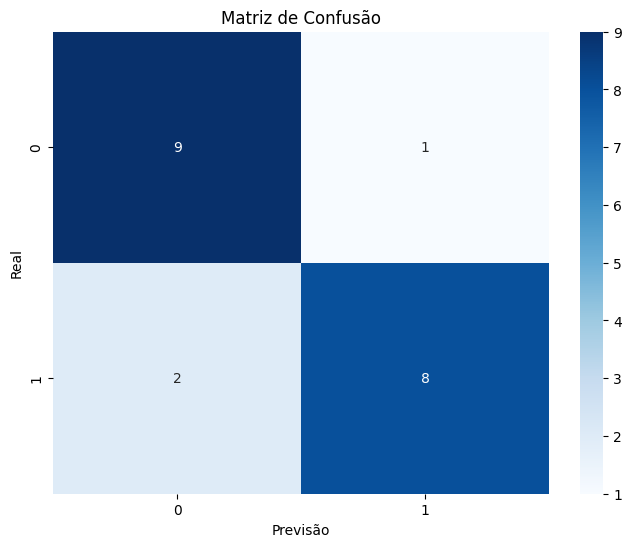

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Supondo que pred contenha as previsões e df_validacao_Classe contenha os valores reais

# Acurácia
accuracy_1 = accuracy_score(df_validacao_Classe, pred)

# Precisão
precision_1 = precision_score(df_validacao_Classe, pred, average='weighted')

# Recall
recall_1 = recall_score(df_validacao_Classe, pred, average='weighted')

# F1-score
f1_1 = f1_score(df_validacao_Classe, pred, average='weighted')

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(df_validacao_Classe, pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Calculando e exibindo as métricas de avaliação
report = classification_report(df_validacao_Classe, pred)
print(report)


ETAPA 4 - VISUALIZAÇÃO DE DADOS

Nessa etapa é realizado a exibição de informações relevantes que foram possivel extrair do processo de analise e estruturação do um modelo de regressão.
Essa exibição é realizada atrravés de diversos gráficos intuitivos

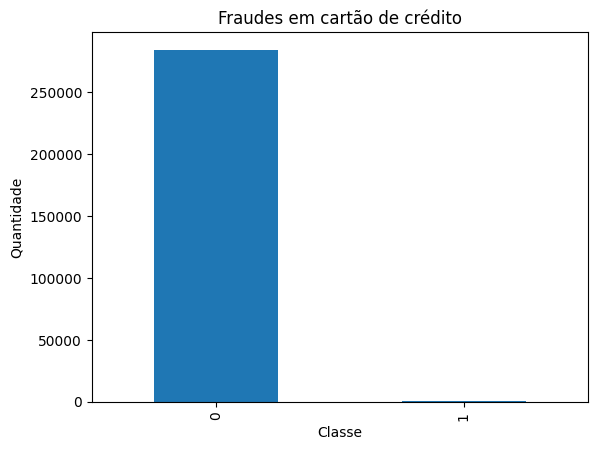

In [ ]:
# Plotando um gráfico de barras que verifica a quantide de dados fraudulentos
value_counts = df['Class'].value_counts()

value_counts.plot(kind='bar')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Fraudes em cartão de crédito')
plt.show()

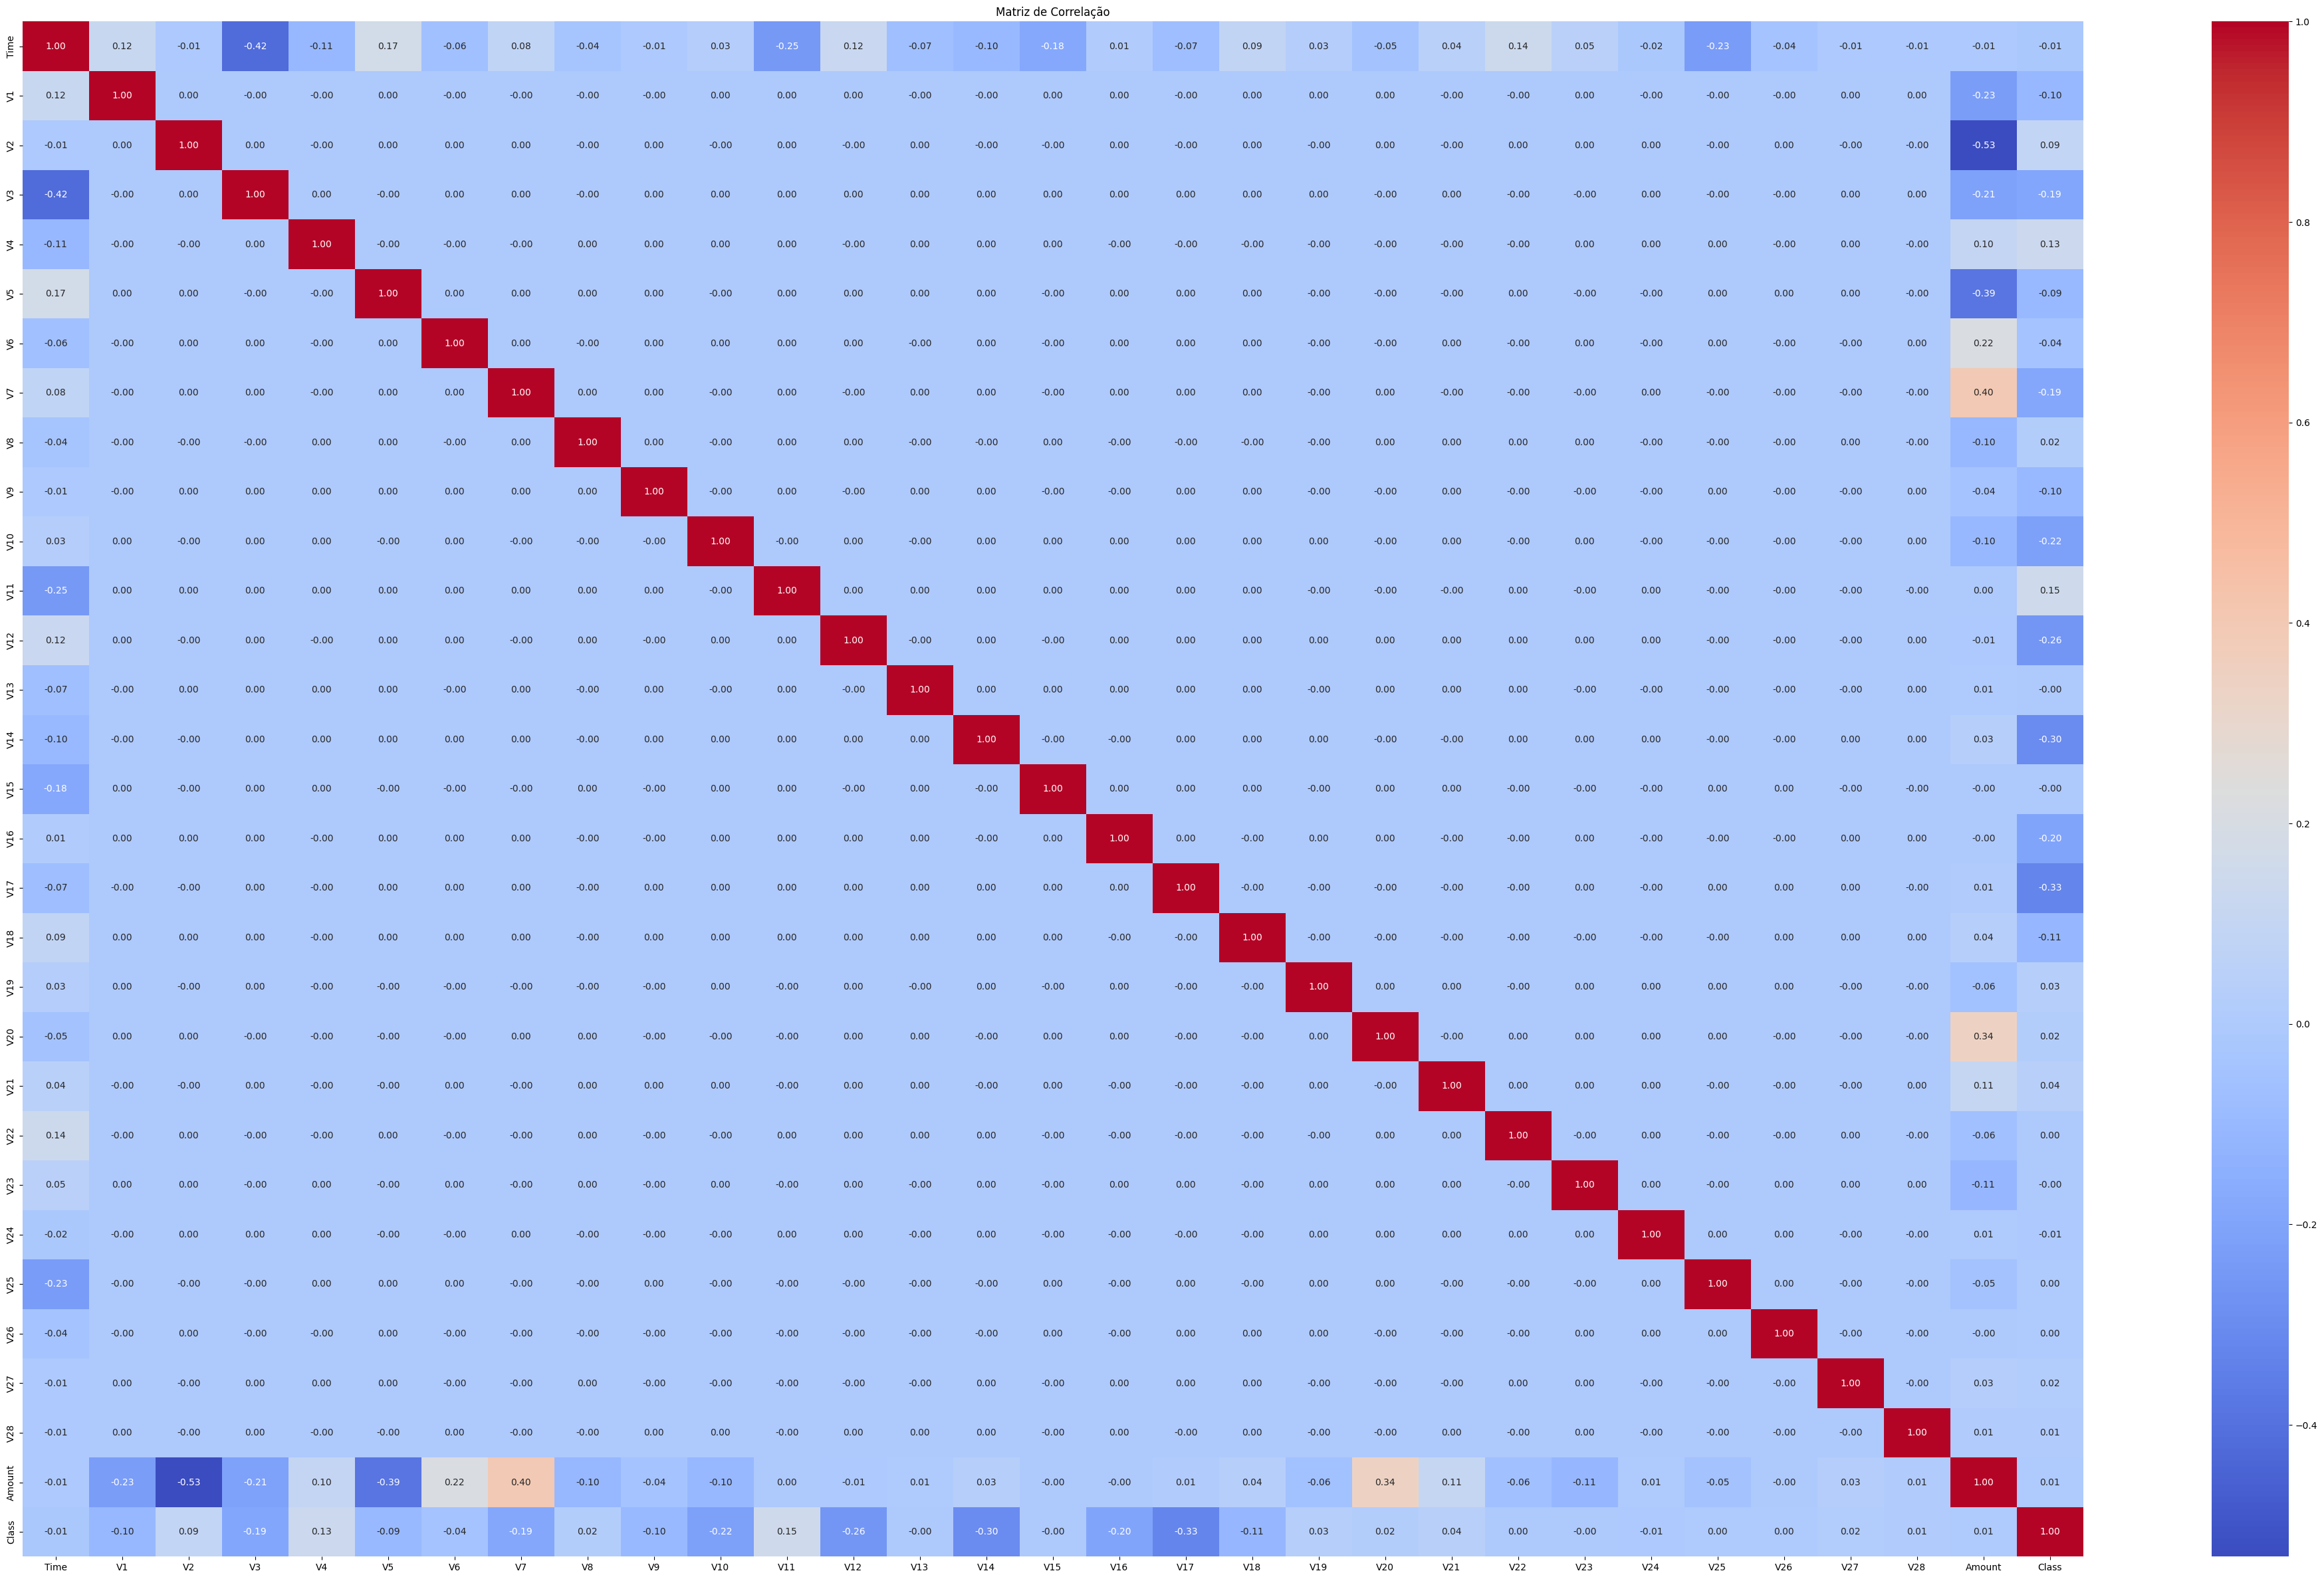

In [ ]:
# Plotando a matriz de correlação
correlation_matrix = df.corr()

plt.figure(figsize=(50, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

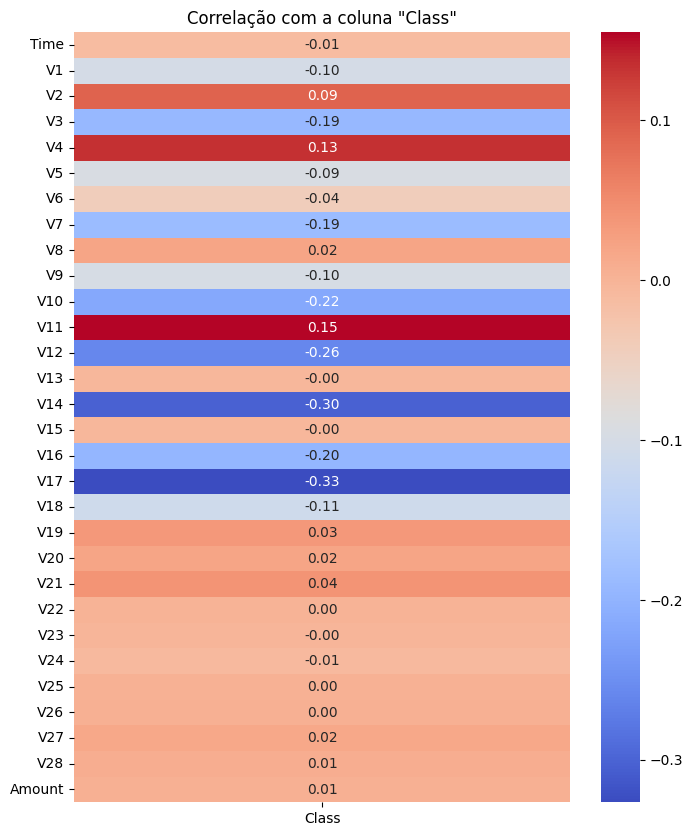

In [ ]:
# Plotando um mapa de calor da correlação apenas para a coluna 'Class' com as outras colunas
correlation_with_class = df.corr()['Class'].to_frame()

plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_class.drop('Class'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação com a coluna "Class"')
plt.show()


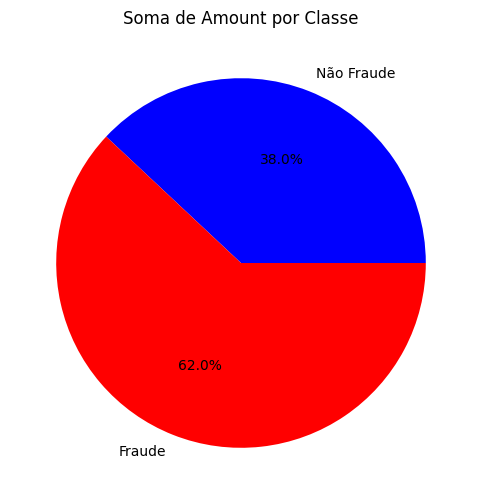

In [ ]:
# Plotando o gráfico de pizza com as somas de 'Amount' por classe
soma_por_classe = df_reg.groupby('Class')['Amount'].sum()

soma_por_classe.index = ['Não Fraude', 'Fraude']

plt.figure(figsize=(8, 6))
plt.pie(soma_por_classe, labels=soma_por_classe.index, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Soma de Amount por Classe')
plt.show()


<Axes: xlabel='Class', ylabel='Amount'>

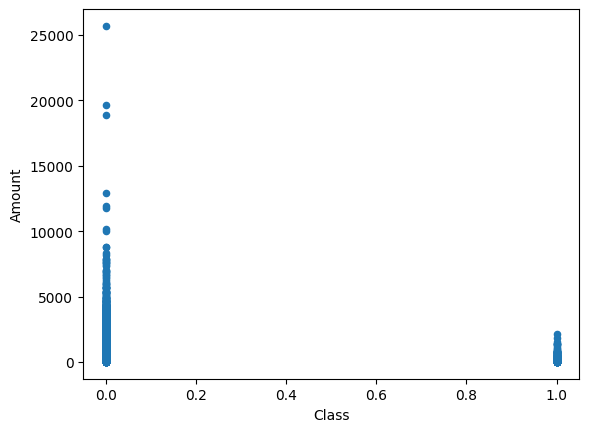

In [ ]:
# Plotando graficos de dispersão entre Class e Amount
df.plot.scatter(x='Class', y='Amount')

<Axes: xlabel='Time', ylabel='Amount'>

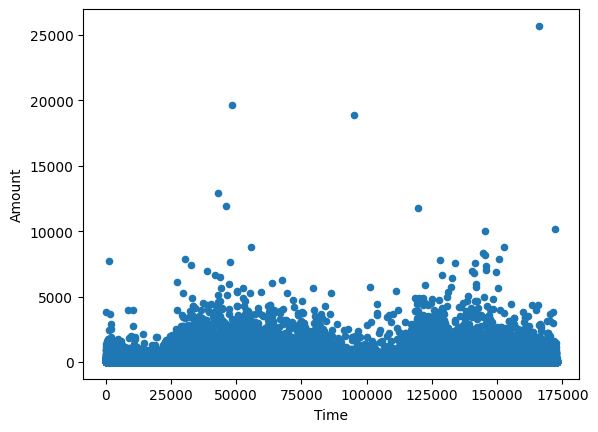

In [ ]:
# Plotando graficos de dispersão entre Time e Amount
df.plot.scatter(x='Time', y='Amount')

**PRINT IV - AULA 02**

A proposta dessa etapa consiste em testar outro algoritmo de clasificação com o objetivo de verificar o desempenho em comparação ao LinearRegression.
Além disso, foi utilizado uma nova tecnicas de avaliação do modelo, conhecida como validação cruzada.

ETAPA 2.1 TREINAMENTO DO MODELO

Nessa etapa é realizado o treinamento do algoritmo RandomForest, a fim de analisar qual seu desempenho em comparação com LogisticRegression.

In [ ]:
#Criando o modelo
model = RandomForestClassifier()

In [ ]:
# Treinamento do modelo e, verificação de sua acurácia
model = model.fit(X_train, Y_train)

pred2 = model.predict(X_test)
acc_RF = accuracy_score(Y_test, pred2)
print('Acurácia: ',acc_RF*100)

Acurácia:  94.97041420118343


In [ ]:
# # Treinamento do modelo e, verificação de sua acurácia com K-Fold
lr2 = LogisticRegression(max_iter=1500)

# Definindo validação cruzada - KFold com k=5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Avaliando o modelo usando validação cruzada
scores = cross_val_score(lr2, X_train, Y_train, cv=kf)
print("Acurácia Média (Cross Validation): {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

# Treinando o modelo nos dados de treinamento
lr.fit(X_train, Y_train)

# Fazendo previsões nos dados de teste
pred02 = lr.predict(X_test)

# Calculando a acurácia do modelo nos dados de teste
acc = accuracy_score(Y_test, pred02)
print('Acurácia nos dados de teste: {:.2f}%'.format(acc * 100))


Acurácia Média (Cross Validation): 0.94 +/- 0.02
Acurácia nos dados de teste: 94.08%


In [ ]:
# Testes no modelo com os 20 dados que haviam sido separados
pred = model.predict(df_validacao)

df_avaliacao = pd.DataFrame({'real': df_validacao_Classe, 'previsão': pred})
df_avaliacao


,real,previsão
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,0,0


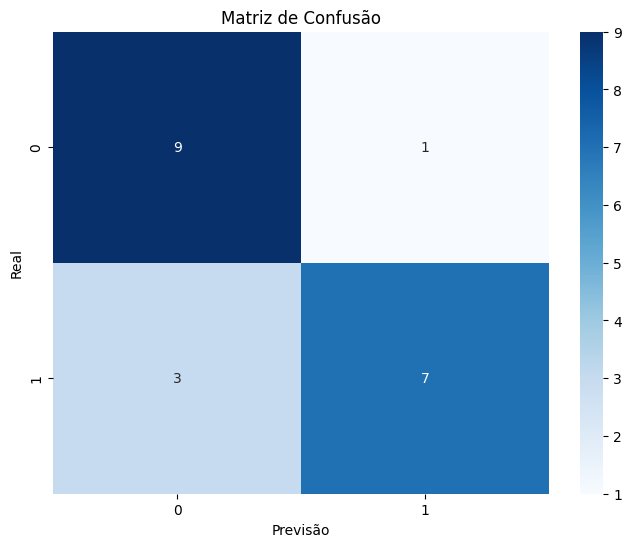

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.88      0.70      0.78        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20



In [ ]:
# Acurácia
accuracy_2 = accuracy_score(df_validacao_Classe, pred)

# Precisão
precision_2 = precision_score(df_validacao_Classe, pred, average='weighted')

# Recall
recall_2 = recall_score(df_validacao_Classe, pred, average='weighted')

# F1-score
f1_2 = f1_score(df_validacao_Classe, pred, average='weighted')

# Calculando a matriz de confusão
conf_matrix02 = confusion_matrix(df_validacao_Classe, pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix02, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Calculando e exibindo as métricas de avaliação
report02 = classification_report(df_validacao_Classe, pred)
print(report02)


Testanto o algoritmo da vizinhança ou K-NN para verificar sua eficiencia em relação ao RandomForest e LogisticRegression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Criando o classificador K-NN com k=1 (1 vizinho)
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, Y_train)

# Fazendo previsões com o conjunto de teste
y_pred = knn.predict(X_test)

acc_KNN = accuracy_score(Y_test, y_pred)
print("Acurácia do modelo K-NN: {:.2f}%".format(acc_KNN * 100))

Acurácia do modelo K-NN: 89.35%


In [ ]:
# Definindo validação cruzada - KFold com k=5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Avaliando o modelo usando validação cruzada
scores = cross_val_score(knn, X_train, Y_train, cv=kf)
print("Acurácia Média (Cross Validation): {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

# Treinando o modelo nos dados de treinamento
lr.fit(X_train, Y_train)

# Fazendo previsões nos dados de teste
pred = lr.predict(X_test)

# Calculando a acurácia do modelo nos dados de teste
acc = accuracy_score(Y_test, pred)
print('Acurácia nos dados de teste: {:.2f}%'.format(acc * 100))


Acurácia Média (Cross Validation): 0.90 +/- 0.02
Acurácia nos dados de teste: 94.08%


In [ ]:
# Testes no modelo com os 20 dados que haviam sido separados
pred = knn.predict(df_validacao)

df_avaliacao = pd.DataFrame({'real': df_validacao_Classe, 'previsão': pred})
df_avaliacao


,real,previsão
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,0,0


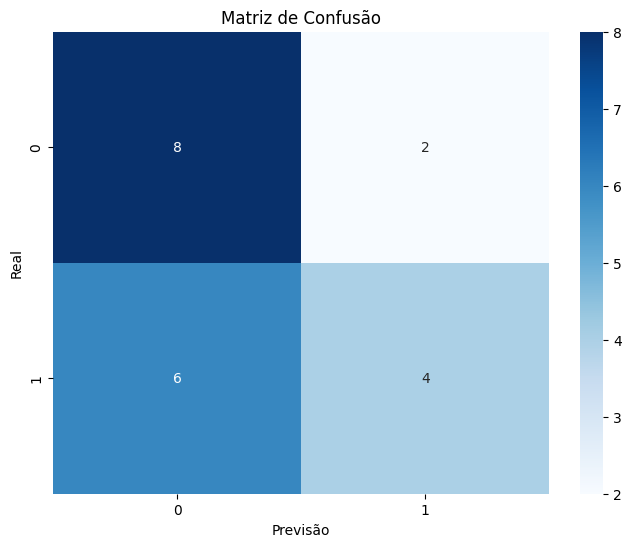

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.67      0.40      0.50        10

    accuracy                           0.60        20
   macro avg       0.62      0.60      0.58        20
weighted avg       0.62      0.60      0.58        20



In [ ]:
# Acurácia
accuracy_3 = accuracy_score(df_validacao_Classe, pred)

# Precisão
precision_3 = precision_score(df_validacao_Classe, pred, average='weighted')

# Recall
recall_3 = recall_score(df_validacao_Classe, pred, average='weighted')

# F1-score
f1_3 = f1_score(df_validacao_Classe, pred, average='weighted')

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(df_validacao_Classe, pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Calculando e exibindo as métricas de avaliação
report = classification_report(df_validacao_Classe, pred)
print(report)


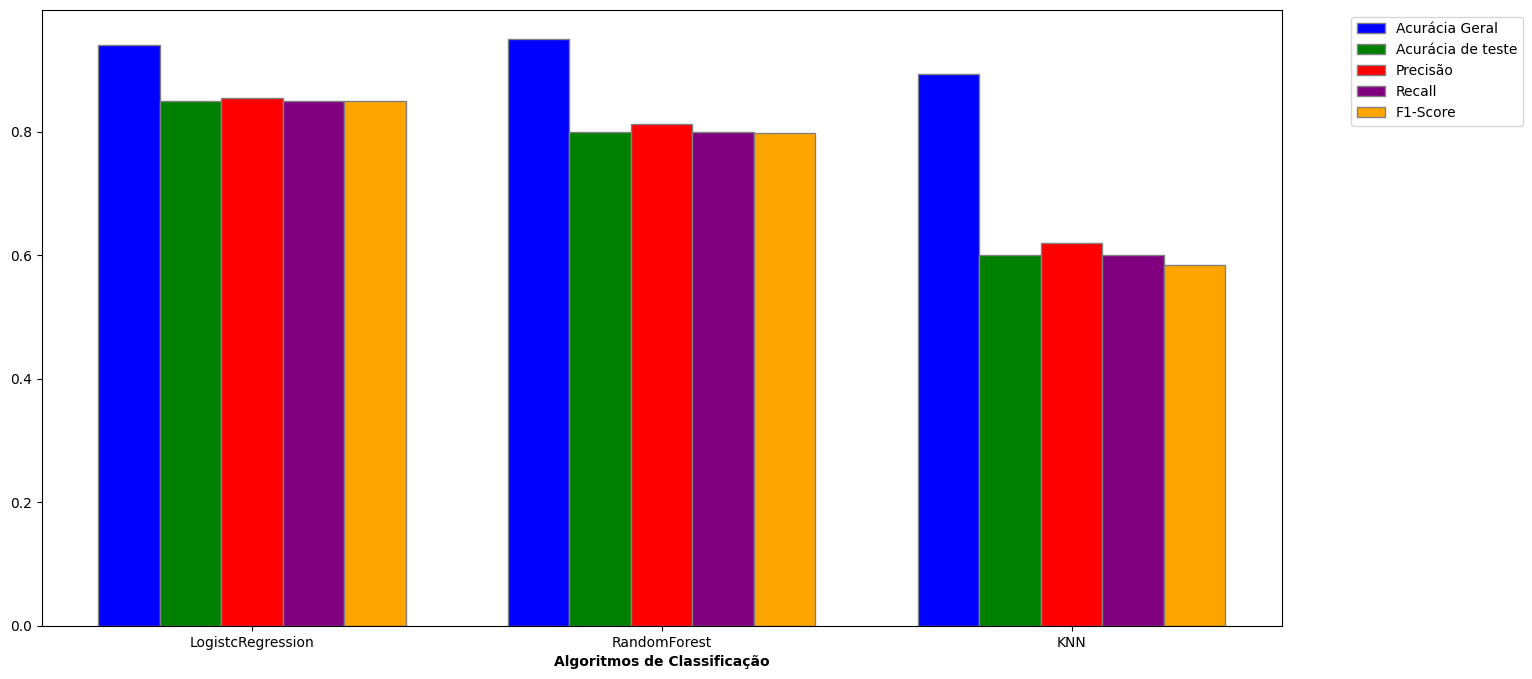

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dados para os gráficos
MD = ['LogistcRegression', 'RandomForest', 'KNN']
acc_geral = [acc_LR, acc_RF, acc_KNN]
acc = [accuracy_1, accuracy_2, accuracy_3]
precisao = [precision_1, precision_2, precision_3]
recall = [recall_1, recall_2, recall_3]
f1 = [f1_1, f1_2, f1_3]

# Configurações do gráfico
barWidth = 0.15
r1 = np.arange(len(MD))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

# Criando o gráfico com tamanho aumentado
plt.figure(figsize=(16, 8))

# Adicionando as barras
plt.bar(r1, acc_geral, color='blue', width=barWidth, edgecolor='grey', label='Acurácia Geral')
plt.bar(r2, acc, color='green', width=barWidth, edgecolor='grey', label='Acurácia de teste')
plt.bar(r3, precisao, color='red', width=barWidth, edgecolor='grey', label='Precisão')
plt.bar(r4, recall, color='purple', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r5, f1, color='orange', width=barWidth, edgecolor='grey', label='F1-Score')

# Adicionando a legenda no canto superior direito fora do gráfico principal
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Adicionando os rótulos e exibindo o gráfico
plt.xlabel('Algoritmos de Classificação', fontweight='bold')
plt.xticks([r + barWidth * 2 for r in range(len(MD))], MD)
plt.show()


In [ ]:
#Separando dados para iniciar o processo de treinamento do algorito
X = df_reg.drop(['index', 'Time', 'Class'], axis=1)
Y = df_reg['Class']

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencodery = LabelEncoder()
y = labelencodery.fit_transform(Y)

from sklearn.preprocessing import StandardScaler
scale_obj = StandardScaler()
X = scale_obj.fit_transform(X.astype(float))

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.35, random_state=18, stratify=Y)

print (X, y)

[[ 0.61138172 -0.82080527  0.56208748 ... -0.19715655 -0.00354214
   0.56933685]
 [ 0.44262402 -0.29181318  0.61140357 ...  0.15454222  0.13305398
  -0.43197786]
 [ 0.47415209 -0.31115573  0.4357634  ...  0.11186486  0.49711401
  -0.43063663]
 ...
 [-0.17297571  0.56570956 -0.54799329 ...  0.26331229  0.5794163
  -0.43470502]
 [-0.50686253 -0.34283271 -0.35761168 ...  0.75855262 -2.35432917
  -0.25766317]
 [-0.91540319 -0.60921563 -0.04614069 ...  1.16847341  0.13409958
  -0.38136893]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=10)
Xtrain = pca.fit_transform(X_train)
Xtest = pca.fit_transform(X_test)

In [ ]:
#LogisticResgression
lr.fit(Xtrain, Y_train)
pred = lr.predict(Xtest)
acc_LR = accuracy_score(Y_test, pred)
print('Acurácia: ',acc_LR*100)

#RandomForest
model = model.fit(Xtrain, Y_train)
pred2 = model.predict(Xtest)
acc_RF = accuracy_score(Y_test, pred2)
print('Acurácia: ',acc_RF*100)

#KNN
knn.fit(Xtrain, Y_train)
y_pred = knn.predict(Xtest)
acc_KNN = accuracy_score(Y_test, y_pred)
print("Acurácia do modelo K-NN: {:.2f}%".format(acc_KNN * 100))

Acurácia:  86.3905325443787
Acurácia:  81.36094674556213
Acurácia do modelo K-NN: 87.87%


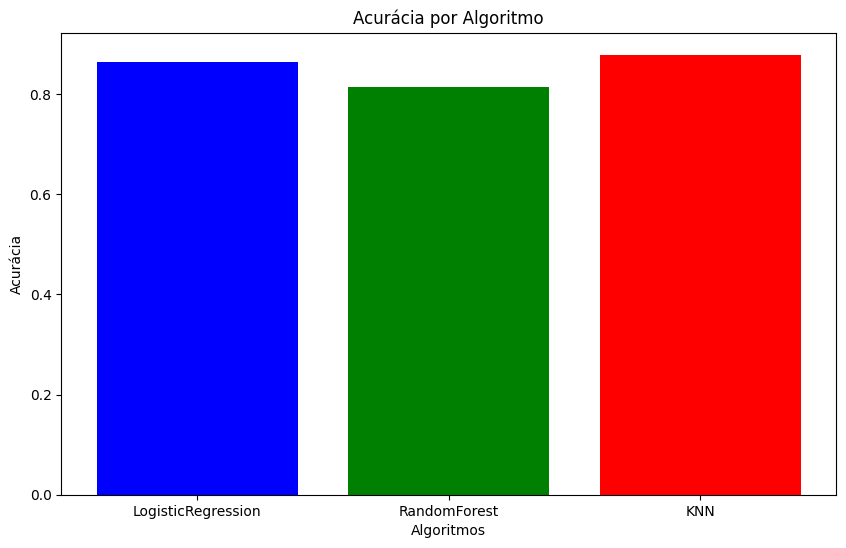

In [ ]:
algoritmos = ['LogisticRegression', 'RandomForest', 'KNN']
acuracia_geral = [acc_LR, acc_RF, acc_KNN]

# Criando o histograma
plt.figure(figsize=(10, 6))
plt.bar(algoritmos, acuracia_geral, color=['blue', 'green', 'red'])
plt.xlabel('Algoritmos')
plt.ylabel('Acurácia')
plt.title('Acurácia por Algoritmo')
plt.show()


# **BoxPlot - algoritmos de classificação**

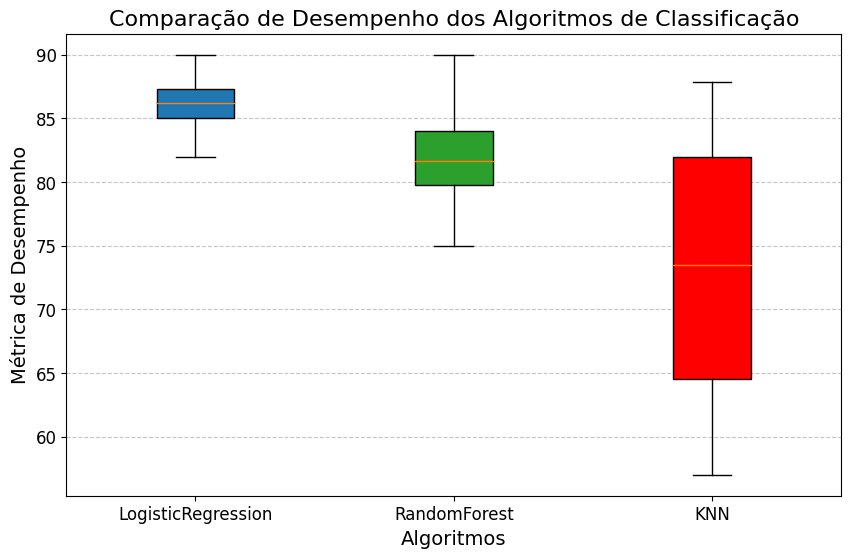

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

LogisticRegression = [86.3905325443787, 82, 90, 86]
RandomForest = [81.36094674556213, 75, 90, 82]
KNN = [87.87, 57, 80, 67]

dados = [LogisticRegression, RandomForest, KNN]
cores = ['#1f77b4', '#2ca02c', '#ff0000']

plt.figure(figsize=(10, 6))
bp = plt.boxplot(dados, patch_artist=True)

for box, cor in zip(bp['boxes'], cores):
    box.set(facecolor=cor)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Comparação de Desempenho dos Algoritmos de Classificação', fontsize=16)
plt.ylabel('Métrica de Desempenho', fontsize=14)
plt.xlabel('Algoritmos', fontsize=14)

plt.xticks([1, 2, 3], ['LogisticRegression', 'RandomForest', 'KNN'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()